In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [19]:
df = pd.read_excel(r'h08.xls')

In [20]:
income = defaultdict(list)
for i in range(5,57):
    for j in range(1,75,2):
        if j == 5 or j == 15:
            continue
        income[df.iloc[i][0]].append(df.iloc[i][j])

In [21]:
d = pd.DataFrame(income)
d = d.iloc[::-1, :]
d.head()

,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,D.C.,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
34,22415,17310,32356,21425,15674,25287,25801,29951,25819,20408,...,19409,16782,23024,23057,22578,26525,25017,16843,20743,23816
33,23618,18333,34782,23877,17451,26981,28182,31090,22980,21076,...,18142,17778,23743,25238,26000,28429,24000,15983,23246,22081
32,24897,19132,31356,25500,18730,29010,27192,32721,25626,24322,...,19898,18256,24162,26281,24599,29715,26881,16464,26430,23559
31,26061,19734,33233,26749,18827,30146,26476,32862,29244,27455,...,21151,21179,24721,26529,25415,29996,27319,17207,26369,27590
30,27225,19948,33103,26435,20172,30287,26214,36213,30505,26741,...,22294,20856,24963,26313,28988,32648,32327,19353,29575,26419


In [22]:
tmp = dict()
for i in range(0,len(d)):
    tmp[i] = str(2018-i)
d = d.rename(index = tmp)
d = d.rename(columns = {'D.C.':'Dist. of Col.'})
d.head()

,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Dist. of Col.,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1984,22415,17310,32356,21425,15674,25287,25801,29951,25819,20408,...,19409,16782,23024,23057,22578,26525,25017,16843,20743,23816
1985,23618,18333,34782,23877,17451,26981,28182,31090,22980,21076,...,18142,17778,23743,25238,26000,28429,24000,15983,23246,22081
1986,24897,19132,31356,25500,18730,29010,27192,32721,25626,24322,...,19898,18256,24162,26281,24599,29715,26881,16464,26430,23559
1987,26061,19734,33233,26749,18827,30146,26476,32862,29244,27455,...,21151,21179,24721,26529,25415,29996,27319,17207,26369,27590
1988,27225,19948,33103,26435,20172,30287,26214,36213,30505,26741,...,22294,20856,24963,26313,28988,32648,32327,19353,29575,26419


In [23]:
All_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
              'Connecticut', 'Delaware', 'Dist. of Col.', 
              'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 
              'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 
              'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
              'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
              'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
              'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 
              'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
              'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin','Wyoming']
WC = ('Washington', 'Oregon', 'California', 'Nevada', 'Arizona', 'Alaska', 'Hawaii')
RM = ('Montana', 'Idaho', 'Wyoming', 'Utah', 'Colorado')
GC = ('New Mexico',  'Texas', 'Arkansas', 'Louisiana',  'Mississippi', 'Alabama')
Midwest = ('North Dakota',  'South Dakota', 'Nebraska',  'Kansas', 'Oklahoma', 
           'Minnesota', 'Iowa', 'Missouri', 'Wisconsin', 'Illinois', 'Indiana', 'Kentucky',
           'Michigan',  'Tennessee', 'Ohio')

East = ('Florida',  'Georgia', 'South Carolina', 'North Carolina', 'Virginia', 'West Virginia', 
              'Maryland',  'Delaware',  'Pennsylvania',  'New Jersey',  'New York',  'Connecticut', 
              'Rhode Island',  'Vermont',  'New Hampshire',  'Massachusetts',  'Maine', 'Dist. of Col.')

In [24]:
region = [WC,RM,GC,Midwest,East]
region_name = ['WC','RM','GC','Midwest','East']

In [25]:
wc,rm,gc,midwest,east = defaultdict(list),defaultdict(list),defaultdict(list),defaultdict(list),defaultdict(list)
income_list = []
income_dict = defaultdict(lambda: defaultdict(list))
for num,k in enumerate(region):
    for j in range(0,len(d)):
        for i in k:
            income_dict[region_name[num]][1984+j].append(d.iloc[j][i])

In [26]:
for reg,data_ in income_dict.items():
    tmp = []
    for year,income_ in data_.items():
        income_dict[reg][year] = sum(income_)/len(income_)
        tmp.append(income_dict[reg][year])
    income_list.append(tmp)

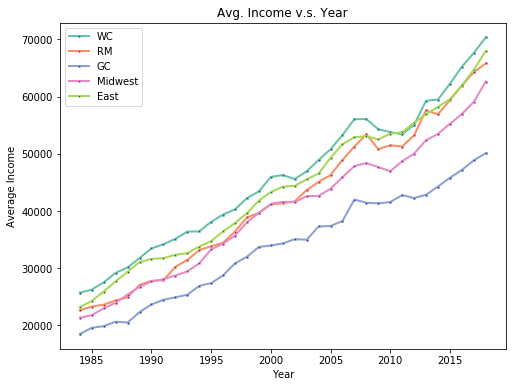

In [27]:
import numpy as np
palette = plt.get_cmap('Set2')
plt.figure(figsize=(8,6))
x = [1984+i for i in range(0,len(d))]
for num,i in enumerate(income_list):
    plt.plot(x,i, marker='o', markerfacecolor='blue', markersize=2, color=palette(num), linewidth=2, label=region_name[num])
plt.legend()
plt.xlabel('Year')
plt.ylabel('Average Income')
plt.title('Avg. Income v.s. Year')
plt.show()


In [34]:
df_income = pd.DataFrame(income_dict)

In [35]:
df_income.index = pd.to_datetime(df_income.index, format='%Y')

In [36]:
df_income

,WC,RM,GC,Midwest,East
1984-01-01,25733.857143,22660.4,18502.833333,21349.533333,23208.944444
1985-01-01,26252.714286,23299.6,19590.333333,21813.800000,24267.944444
1986-01-01,27534.285714,23621.8,19878.666667,22959.866667,25916.500000
1987-01-01,29197.857143,24364.8,20650.333333,23970.666667,27704.500000
1988-01-01,30129.571429,24925.4,20507.000000,25398.666667,29385.888889
1989-01-01,31776.000000,27078.0,22330.500000,26742.866667,31074.833333
1990-01-01,33449.857143,27803.0,23665.500000,27680.400000,31630.833333
1991-01-01,34193.714286,27901.6,24471.333333,28068.333333,31747.500000
1992-01-01,35130.142857,30234.6,24918.666667,28722.933333,32359.166667
1993-01-01,36397.571429,31439.2,25351.500000,29429.533333,32610.833333
